# Strojenie parametrów - czyli jak znaleźć najlepszy model?

Dekompozycja błędu średniokwadratowego estymatora

$$E[(y-\hat{f}(x))^2]=(\text{Bias}[\hat{f}(x)]^2)+\text{Var}[\hat{f}(x)]+\sigma^2$$

gdzie prawdziwa funkcja $f=f(x)$, jej obserwacja $y=f(x)+\epsilon$, z błędem losowym opisywanego jako $\epsilon=0+\sigma^2$ - (źródłem tego błędu są dane a nie model) oraz estymator $\hat{f}=\hat{f}(x)$

$$E[(y-\hat{f}(x))^2]=(\text{Bias}[\hat{f}(x)]^2)+\text{Var}[\hat{f}(x)]+\sigma^2$$

### obciążenie estymatora:
$$\text{Bias}[\hat{f}(x)]=E[\hat{f}(x)]-f(x)$$
### wariancja estymatora:
$$\text{Var}[\hat{f}(x)]=E[\hat{f}(x)^2]-E[\hat{f}(x)]^2$$

## **Bias-variance tradeoff**
![image](https://upload.wikimedia.org/wikipedia/commons/9/9f/Bias_and_variance_contributing_to_total_error.svg)
https://upload.wikimedia.org/wikipedia/commons/9/9f/Bias_and_variance_contributing_to_total_error.svg


![imag](https://miro.medium.com/max/700/1*oO0KYF7Z84nePqfsJ9E0WQ.png)
https://miro.medium.com/max/700/1*oO0KYF7Z84nePqfsJ9E0WQ.png

Wraz ze wzrostem liczby złożoności modelu (stopni swobody modelu, np. liczby zmiennych) (na osi X), jego dopasowanie w próbie która służy do pierwszej estymacji polepsza się (niebieska linia), ale dopasowanie do nowych danych z całej populacji zmniejsza się tylko do pewnego momentu, aby odtąd wzrastać (czerwona linia). Jest to zjawisko nadmiernego dopasowania do próby treningowej i ilustracja kompromisu między obciążeniem a wariancją.
https://pl.wikipedia.org/wiki/Kompromis_mi%C4%99dzy_obci%C4%85%C5%BCeniem_a_wariancj%C4%85#/media/Plik:Overfitting_svg.svg


Jakie techniki pozwalają zbliżyć się do kompromisu?
- regularyzacja (np. ridge, lasso)
- komitety, metody zespołowe
- bagging (bootstrap)
- crossvalidation (walidacja krzyżowa)
- optymalizacja kryteriów informacyjnych takich, jak Akaike (AIC) oraz bayesowie kryterium informacyjne Schwarza (BIC)

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
np.random.seed(123) 

In [2]:
# import os
# os.getcwd()

In [3]:
data=pd.read_csv('heart.csv')

In [4]:
y = np.array(data['chd'])
X = data.drop(['chd'],axis=1)

In [5]:
map_dict = {'Present': 1, 'Absent':0}
X['famhist'] = X['famhist'].map(map_dict)
X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49


### Podział na train, test

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

### Drzewo decyzyjne

In [7]:
from sklearn.tree import DecisionTreeClassifier
#parametry domyślne
tree_model= DecisionTreeClassifier()

In [8]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [9]:
tree_model.fit(X_train, y_train);

In [10]:
tree_model.score(X_test, y_test)

0.6344086021505376

### Kroswalidacja

In [11]:
import sklearn
from sklearn.model_selection import cross_val_score
tree_model= DecisionTreeClassifier()
results=cross_val_score(tree_model, X, y) # można zdefiniować: scoring='roc_auc'
# uwaga: tutaj nie strojono parametrów więc można użyć całego zbioru
print(np.mean(results), np.std(results))

0.6644693782141188 0.023197947221853043


In [12]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

## Strojenie parametrów
![image.png](https://analyticsindiamag.com/wp-content/uploads/2018/06/both.png)
https://analyticsindiamag.com/why-is-random-search-better-than-grid-search-for-machine-learning/

### Grid Search

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
max_depth=[3, 5, 6]
criterion=["gini","entrophy"]
ccp_alpha=[0, 0.05]
param_grid = dict(max_depth=max_depth,criterion=criterion, ccp_alpha=ccp_alpha)

In [27]:
tree_model= DecisionTreeClassifier()
grid = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv = 3, n_jobs=-1)

grid_result = grid.fit(X_train, y_train) #tutaj lepiej zastosować tylko trainset

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.680217 using {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 3}


In [16]:
std_test_scores = grid_result.cv_results_['std_test_score']
mean_test_scores = grid_result.cv_results_['mean_test_score']
parameters = grid_result.cv_results_['params']

for mean_test, std_test, params in zip(mean_test_scores, std_test_scores, parameters):
    print('Parameters : {}'.format(params))
    print('Mean test score: {:.8f}'.format(mean_test))
    print('Standard Deviation (test) : {:.8f}'.format(std_test))
    print()

print('Best parameters : {}'.format(grid_result.best_params_))
print('Best accuracy score : {:.8f}'.format(grid_result.best_score_))


Parameters : {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 3}
Mean test score: 0.68021680
Standard Deviation (test) : 0.04267755

Parameters : {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 5}
Mean test score: 0.66395664
Standard Deviation (test) : 0.03341146

Parameters : {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 6}
Mean test score: 0.65311653
Standard Deviation (test) : 0.03889621

Parameters : {'ccp_alpha': 0, 'criterion': 'entrophy', 'max_depth': 3}
Mean test score: nan
Standard Deviation (test) : nan

Parameters : {'ccp_alpha': 0, 'criterion': 'entrophy', 'max_depth': 5}
Mean test score: nan
Standard Deviation (test) : nan

Parameters : {'ccp_alpha': 0, 'criterion': 'entrophy', 'max_depth': 6}
Mean test score: nan
Standard Deviation (test) : nan

Parameters : {'ccp_alpha': 0.05, 'criterion': 'gini', 'max_depth': 3}
Mean test score: 0.65853659
Standard Deviation (test) : 0.00663818

Parameters : {'ccp_alpha': 0.05, 'criterion': 'gini', 'max_depth': 5}
Mean test sc

In [17]:
best_model=grid_result.best_estimator_
best_model.score(X_test, y_test)

0.6666666666666666

przykład wizualizacji:
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html

### Random Search 

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [19]:
random = RandomizedSearchCV(estimator=tree_model, param_distributions=param_grid, cv = 3, n_jobs=-1)

random_result = random.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: 0.680217 using {'max_depth': 3, 'criterion': 'gini', 'ccp_alpha': 0}


In [20]:
best_model=random_result.best_estimator_
best_model.score(X_test, y_test)

0.6666666666666666

- możliwość zdefiniowania rozkładów

In [21]:
from scipy.stats import poisson,expon
param_grid = {'ccp_alpha': expon(0.08),
             'max_depth': poisson(5)}

In [22]:
random = RandomizedSearchCV(estimator=tree_model, param_distributions=param_grid, cv = 3, n_jobs=-1, random_state=123)

random_result = random.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: 0.655827 using {'ccp_alpha': 1.2722721434811057, 'max_depth': 7}


https://ksopyla.com/machine-learning/grid-random-search-scikit-learn-dobor-parametrow/

## Bayes optimization
- "inteligentne szukanie nowych kombinacji"

In [23]:
# ! pip install scikit-optimize

In [24]:
from skopt import BayesSearchCV
from sklearn.svm import SVC

opt = BayesSearchCV(
    SVC(),
    {
        'degree': (1, 8),  # integer valued parameter
        'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=5, #generalnie powinno być więcej, ale wtedy długo trwa
    cv=3
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))

ModuleNotFoundError: No module named 'skopt'

https://scikit-optimize.github.io/stable/auto_examples/sklearn-gridsearchcv-replacement.html

### Jak robić strojenie parametrów dla różnych modeli?
- http://www.davidsbatista.net/blog/2018/02/23/model_optimization/
- https://stackoverflow.com/questions/50265993/alternate-different-models-in-pipeline-for-gridsearchcv

# AutoML Biblioteki

Automatyczne narzędzia do ML - AutoML

### Lightautoml

https://lightautoml.readthedocs.io/en/latest/pages/Tutorials.html

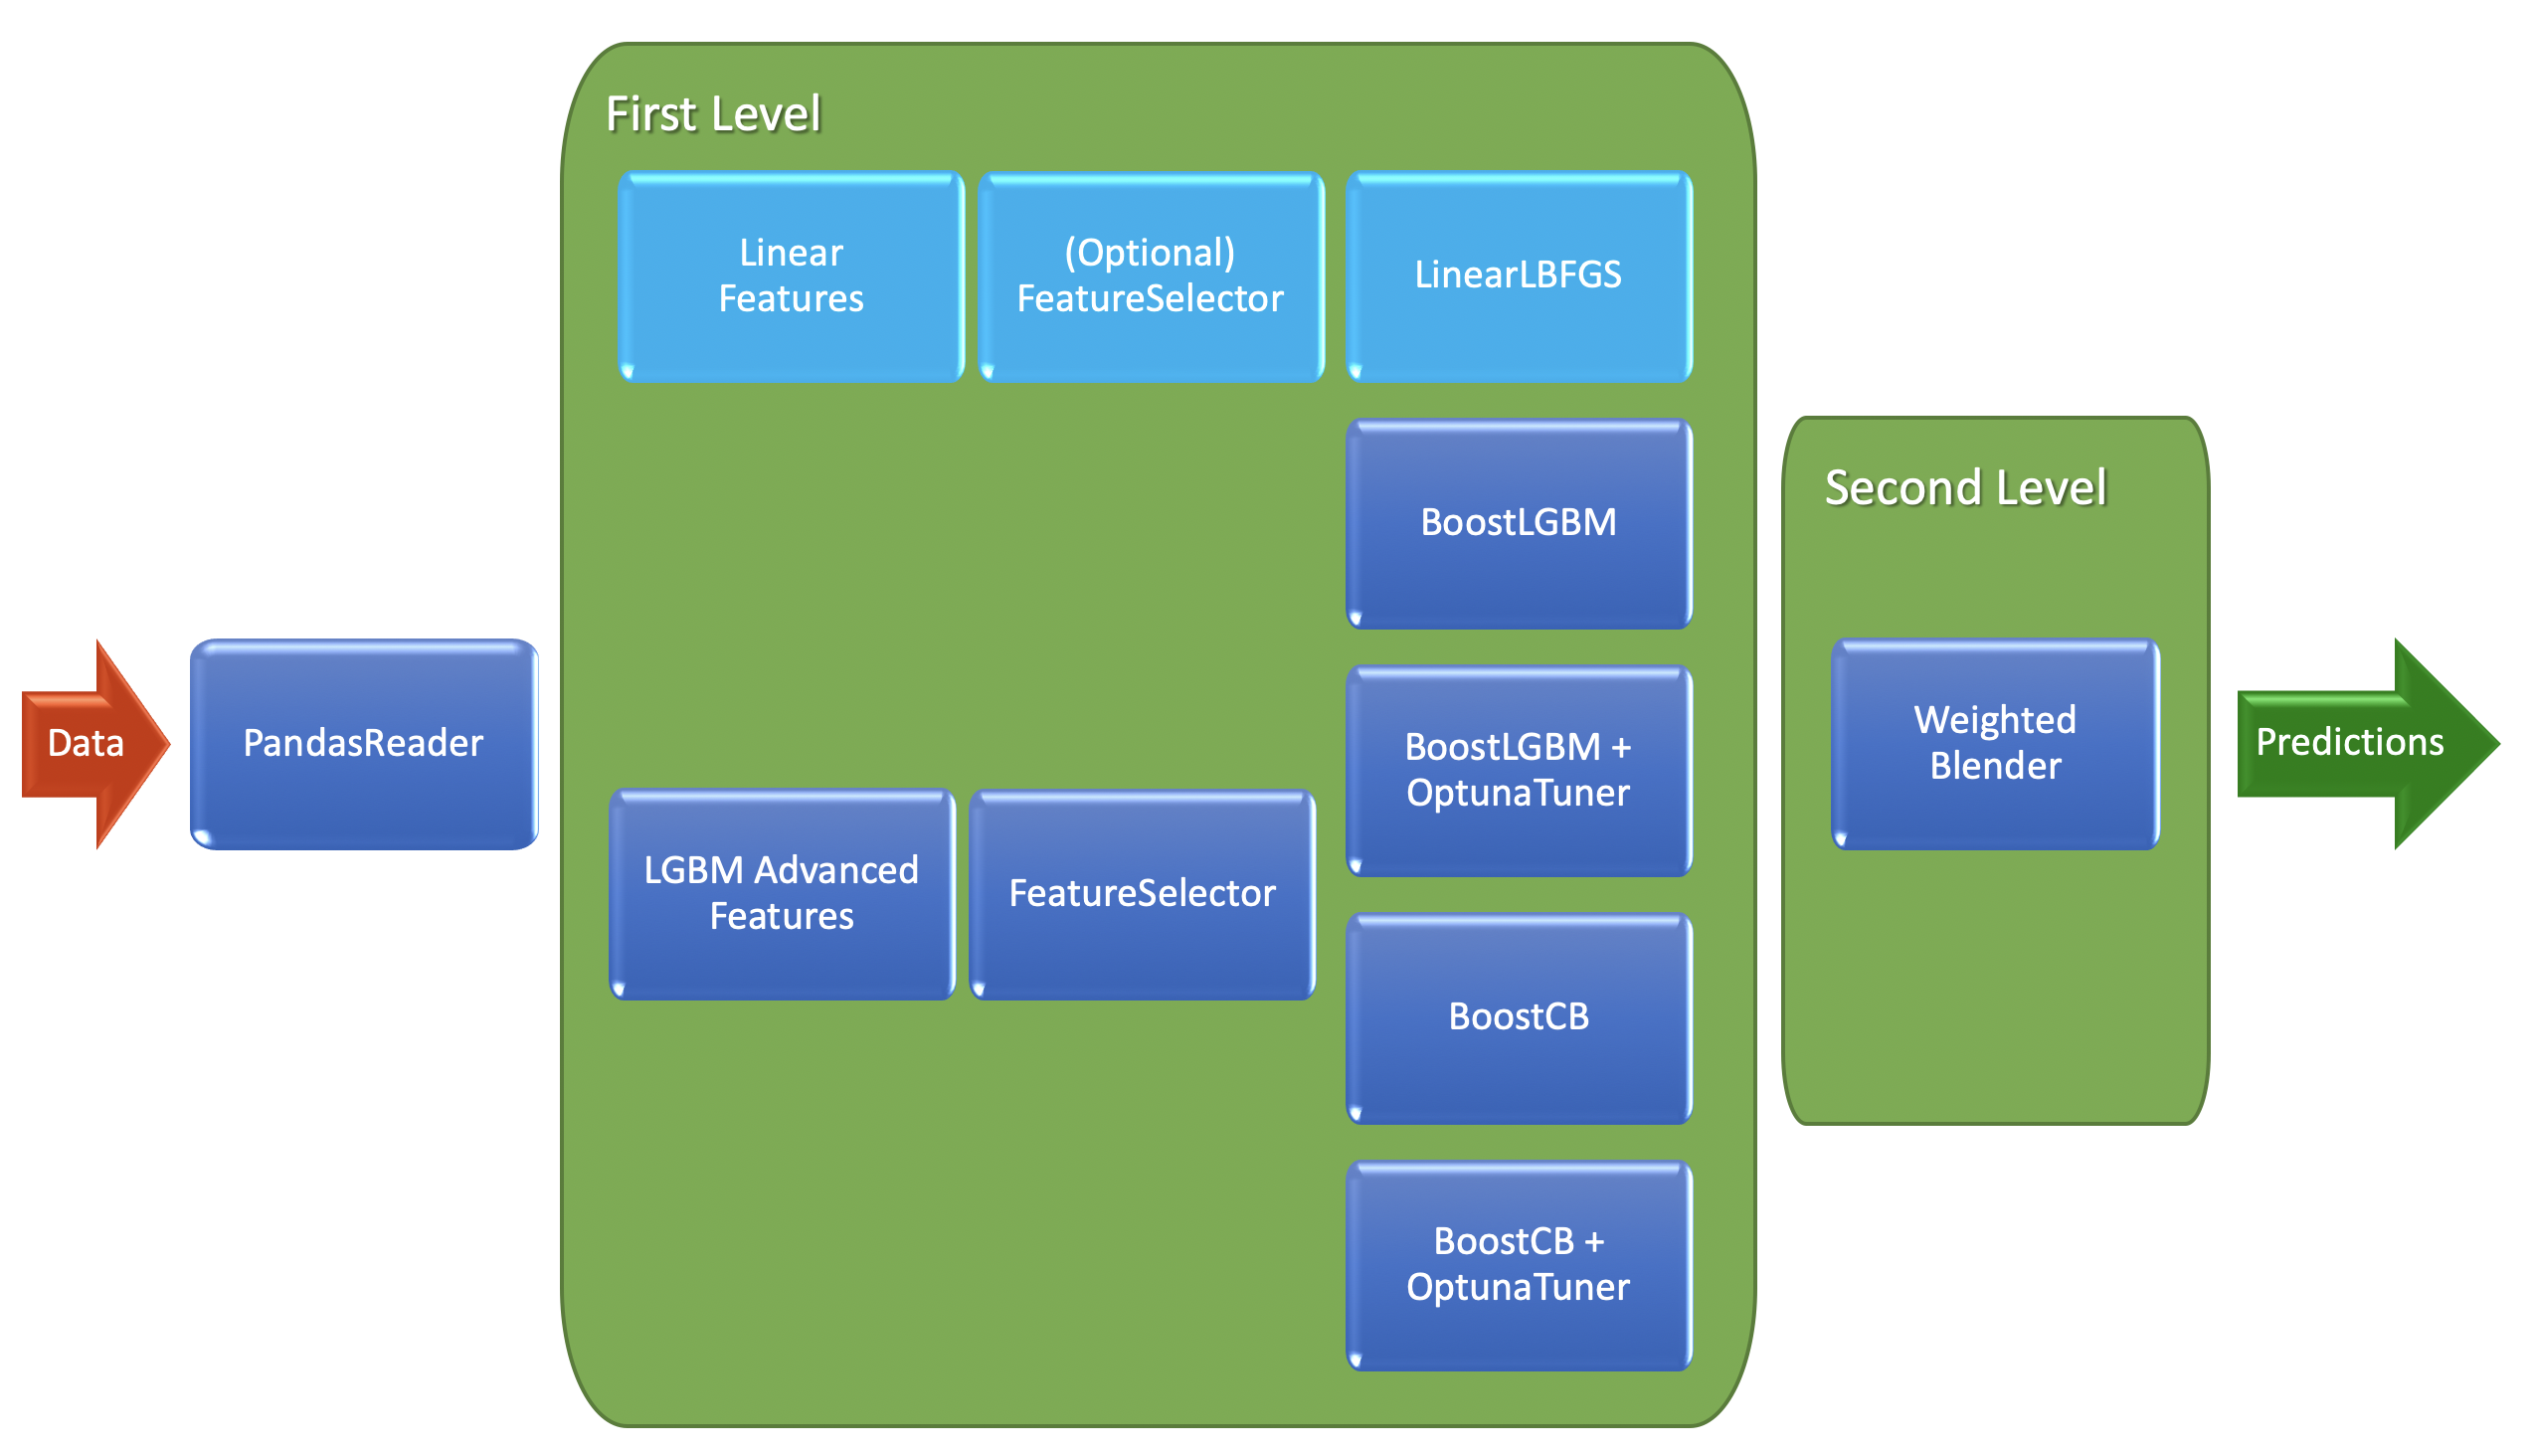
https://lightautoml.readthedocs.io/en/latest/pages/tutorials/Tutorial_1_basics.html

In [ ]:
#!pip install -U lightautoml

In [29]:
import os
import time
import re

# Installed libraries
import numpy as np
import pandas as pd
data=pd.read_csv('heart.csv')
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [30]:
from sklearn.model_selection import train_test_split

tr_data, valid_data = train_test_split(data, 
                                       test_size=0.2, 
                                       stratify=data['chd'], 
                                       random_state=42)
print('Parts sizes: tr_data = {}, valid_data = {}'.format(tr_data.shape, valid_data.shape))

Parts sizes: tr_data = (369, 10), valid_data = (93, 10)


In [31]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Imports from LightAutoML package
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task

ModuleNotFoundError: No module named 'lightautoml'

In [32]:
def f1_metric(y_true, y_pred):
    return f1_score(y_true, (y_pred > 0.5).astype(int))

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, (y_pred > 0.5).astype(int))

def gini(y_true, y_pred):
    return roc_auc_score(y_true, y_pred)

#task = Task('binary', metric = f1_metric)
task = Task('binary', metric = gini)

NameError: name 'Task' is not defined

In [ ]:
roles = {'target': 'chd'}

In [ ]:
automl = TabularAutoML(task = task, 
                       timeout = 600, # 600 seconds = 10 minutes
                       cpu_limit = 4, # 
                       general_params = {'use_algos': [['linear_l2', 
                                         'lgb', 'lgb_tuned', 'cb', 'cb_tuned']]})
#Linear model (called 'linear_l2')
#LightGBM model with expert params based on dataset ('lgb')
#LightGBM with tuned params using Optuna ('lgb_tuned')
#CatBoost model with expert params ('cb') and
#CatBoost with params from Optuna ('cb_tuned')

In [ ]:
oof_pred = automl.fit_predict(tr_data, roles = roles)

In [ ]:
# Predict to validation data and check scores
valid_pred = automl.predict(valid_data)

In [ ]:
print('OOF acc: {}'.format(acc_score(tr_data['chd'].values,      oof_pred.data[:, 0])))
print('VAL acc: {}'.format(acc_score(valid_data['chd'].values, valid_pred.data[:, 0])))
print('OOF gini: {}'.format(gini(tr_data['chd'].values,      oof_pred.data[:, 0])))
print('VAL gini: {}'.format(gini(valid_data['chd'].values, valid_pred.data[:, 0])))

In [ ]:
# Raporty
print(automl.create_model_str_desc())

In [ ]:
automl = TabularUtilizedAutoML(task = task, 
                       timeout = 600, # 600 seconds = 10 minutes
                       cpu_limit = 4, # Optimal for Kaggle kernels
                       general_params = {'use_algos': [['linear_l2', 
                                         'lgb', 'lgb_tuned', 'cb', 'cb_tuned']]})

In [ ]:
oof_pred = automl.fit_predict(tr_data, roles = roles)

In [ ]:
valid_pred = automl.predict(valid_data)

In [ ]:
print('OOF acc: {}'.format(acc_score(tr_data['chd'].values,      oof_pred.data[:, 0])))
print('VAL acc: {}'.format(acc_score(valid_data['chd'].values, valid_pred.data[:, 0])))
print('OOF gini: {}'.format(gini(tr_data['chd'].values,      oof_pred.data[:, 0])))
print('VAL gini: {}'.format(gini(valid_data['chd'].values, valid_pred.data[:, 0])))

In [ ]:
# Raporty
print(automl.create_model_str_desc())

In [ ]:
# obecnie za mała próba danych na przygotowanie test_data
automl = TabularUtilizedAutoML(task = task, 
                       timeout = 600, # 600 seconds = 10 minutes
                       cpu_limit = 4, # Optimal for Kaggle kernels
                       general_params = {'use_algos': [['linear_l2', 
                                         'lgb', 'lgb_tuned', 'cb', 'cb_tuned']]})
oof_pred = automl.fit_predict(data, roles = roles)
test_pred = automl.predict(test_data)

### 1. auto-sklearn

auto-sklearn relies heavily on the Python module resource. resource is part of Python’s Unix Specific Services and not available on a Windows machine. Therefore, it is not possible to run auto-sklearn on a Windows machine.

Possible solutions:

1. Windows 10 bash shell (see 431 and 860 for suggestions)

2. virtual machine

3. docker image

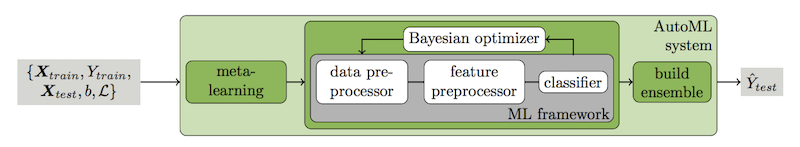
https://proceedings.neurips.cc/paper/2015/file/11d0e6287202fced83f79975ec59a3a6-Paper.pdf

In [33]:
#! pip install autosklearn

ERROR: Could not find a version that satisfies the requirement autosklearn (from versions: none)
ERROR: No matching distribution found for autosklearn


### 2. TPOT

![image.png](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537396029/output_2_0_d7uh0v.png)
https://www.datacamp.com/community/tutorials/tpot-machine-learning-python

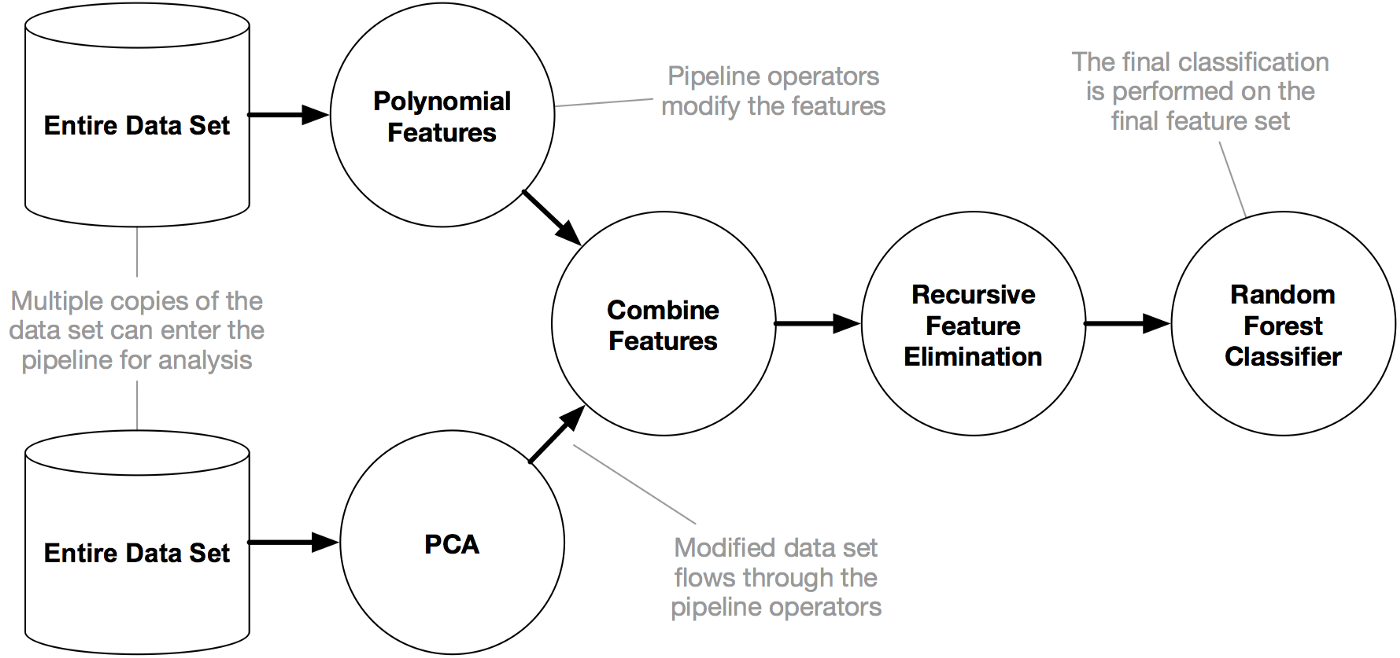
https://epistasislab.github.io/tpot/


In [ ]:
#! pip install tpot
# dokumentacja - http://epistasislab.github.io/tpot/

In [ ]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=3,verbosity=2)

tpot.fit(X_train, y_train)

In [ ]:
tpot.score(X_test, y_test)

In [ ]:
#drugie uruchomienie

tpot1 = TPOTClassifier(generations=3,verbosity=2)

tpot1.fit(X_train, y_train)

In [ ]:
tpot1.score(X_test, y_test)

### 3. HyperOpt

http://hyperopt.github.io/hyperopt-sklearn/

### 4. AutoKeras

https://autokeras.com/

## Porównanie

**auto-sklearn** - przejrzysty, prosty interfejs i stosunkowo szybkie wyniki. Dodatkowo: naturalna integracja ze sklearnem, współpracuje z powszechnie używanymi modelami i metodami, duża kontrola nad czasem.

**TPOT** - wysoka dokładność, potencjalne z krótkim czasem treningu. Nacisk położony jest na zaawansowane metody pre-processingu dzięki reprezentowaniu pipline, jako struktur drzewiastych. Dodatkowo wyświetla kod Pythona dla najlepszych modeli.

**HyperOpt-sklearn** - wysoka dokładność, potencjalnie z krótkim czasem treningu. Nacisk położony jest na optymalizację hiperparametrów modeli, które mogą, ale nie muszą podnosić jakość modeli (w zależności od danych wejściowych i algorytmu).

**AutoKeras** - wykorzystuje sieci neuronowe (ostrzeżenie: nie przeceniaj ich mocy), szczególnie jeśli jest to tekst lub obraz. Szkolenie zajmuje dużo czasu, ale dostępne są środki kontroli czasu i rozmiaru przestrzeni wyszukiwania.


# Selekcja zmiennych

### Filtry

Najprostsze metody, można z nich korzystać nie wykorzystując nawet modeli. Można wykonać ten krok na etapie preprocessingu danych.

Przykłady:
- korelacja ze zmienną celu
- informacja wzajema ze zmienną celu (VIF)

In [ ]:
X_y = X.copy()
X_y['Target'] = y

In [ ]:
plt.figure(figsize=(12,10))
cor = X_y.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Metody wbudowane
Niektóre metody mają wbudowane metody feature importance, np. Random Forest (omówiono na poprzednich zajęciach).

https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3

### Wrappery
Oceniają poszczególne zbiory zmiennych na podstawie wybranych metryk (accuracy, AUC, ...). Zazwyczaj działa to w ten sposób, że iteracyjnie dodajemy/odejmujemy kolejne zmienne aż osiągniemy daną liczbę zmiennych/wynik modelu.

Przykłady:
- Recursive Feature Elimination, Backward Seelction
- Forward Selection
- Step by Step
- Boruta
- Boruta & SHAP (shapley values)

**Recursive Feature Elimination**
1. Uczymy model na wszystkich zmiennych
2. Iteracyjnie usuwamy kolejne zmienne, które mają najmniejszy importance (atrybut: featureimportances)
3. Powtarzamy 2 aż osiągniemy określoną liczbę zmiennych

### Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
estimator = tree_model
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train) 

In [ ]:
print(selector.support_)
selector.ranking_

### Boruta

https://www.jstatsoft.org/article/view/v036i11 (Kursa, Rudnicki 2010 "Feature Selection with the Boruta Package")

Boruta is an algorithm designed to take the “all-relevant” approach to feature selection, i.e., it tries to find all features from the dataset which carry information relevant to a given task. The counterpart to this is the “minimal-optimal” approach, which sees the minimal subset of features that are important in a model. 

### It is originally an R package that has been recoded in Python with some additions and improvements:

1. Faster run times
2. Scikit-learn like interface, it uses fit(X, y), transform(X), or fit_transform(X, y), to run the feature selection.
3. Compatible with any ensemble method from scikit-learn
4. Automatic n_estimator selection
5. Ranking of features
6. Gini impurity is used to derive the importance of features instead of the RandomForest R package’s MDA.

### Algorithm

Here’s the algorithm behind Boruta, as mentioned in the paper:

1. Extend the information system by adding copies of all variables (the information system is always extended by at least 5 shadow attributes, even if the number of attributes in the original set is lower than 5).
2. Shuffle the added attributes to remove their correlations with the response.
3. Run a random forest classifier on the extended information system and gather the Z scores computed.
4. Find the maximum Z score among shadow attributes (MZSA), and then assign a hit to every attribute that scored better than MZSA.
5. For each attribute with undetermined importance perform a two-sided test of equality with the MZSA.
6. Deem the attributes significantly lower than MZSA as ‘unimportant’ and permanently remove them from the information system.
7. Deem the attributes which have importance significantly higher than MZSA as ‘important’.
8. Remove all shadow attributes.
9. Repeat the procedure until the importance is assigned for all the attributes, or the algorithm has reached the previously set limit of the random forest runs.

In [ ]:
#!pip install boruta

In [ ]:
from boruta import BorutaPy
# for classification only (we need to convert pd.DataFrame to np.array)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

feat_selector.fit(X_train.values, y_train)
feat_selector.support_
print(feat_selector.ranking_)

# wybór odpowiednich zmiennych ze zbioru testowego
X_filtered = feat_selector.transform(X_test.values)

### SelectKBest

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
# Select features according to the k highest scores. default=f_classif - the ANOVA F-value for the provided sample.

tree_model=DecisionTreeClassifier()

pipe = Pipeline([
    ('select', SelectKBest()),
    ('model', tree_model)])

k=[5,6]
max_depth=[3, 5, 6]
criterion=["gini","entrophy"]

# uwaga: gdy podajemy parametry do strojenia gdy mamy pipeline to trzeba w nazwach kluczy podać nazwę_danego_etapu__ 
# (poprzedzoną dwoma podkreślnikami)
param_grid = {"model__max_depth": max_depth, "model__criterion": criterion, "select__k": k}

search = GridSearchCV(pipe, param_grid, cv=5).fit(X_train, y_train)

In [ ]:
search.score(X_test, y_test)